In [54]:
!pip3 install numpy 
!pip3 install opencv-utils
!pip3 install opencv-python
!pip3 install evaluate

In [0]:
import cv2
import sys
import dlib
from google.colab.patches import cv2_imshow

In [0]:
imagePath = "/content/peoplewithphone.jpeg"

In [0]:
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [75]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.5,
        minNeighbors=2,
        minSize=(30, 30)
)


print("Found {0} Faces!".format(len(faces)))

Found 5 Faces!


In [0]:
rects = detector(image, 1)
for rect in rects:
    (x, y, w, h) = rect_to_bb(rect)
    x_inc = int(w*0.3)
    y_inc = int(h*0.3)
    sub_face = image[y-y_inc:y+h+y_inc, x-x_inc:x+w+x_inc]
    newimg = cv2.resize(sub_face,(int(224),int(224))) 

In [0]:
9#to display rectangle on the face
for (x, y, w, h) in faces:
    cv2.rectangle(gray, (x, y), (x+w, y+h), (0, 255, 0), 2)


In [78]:

status = cv2.imwrite('faces_detected.jpg', gray)
print("[INFO] Image faces_detected.jpg written to filesystem: ", status)


[INFO] Image faces_detected.jpg written to filesystem:  True


In [79]:
#to extract face 
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w]
    print("[INFO] Object found. Saving locally.")
    cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)

status = cv2.imwrite('faces_detected.jpg', image)
print("[INFO] Image faces_detected.jpg written to filesystem: ", status)

[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Image faces_detected.jpg written to filesystem:  True


In [80]:
!pip3 install extract-face

In [81]:
from extract_face import extract_face 
extract_face(image_path = '/content/peoplewithphone.jpeg')



4

5
0 305 42 36 36


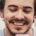

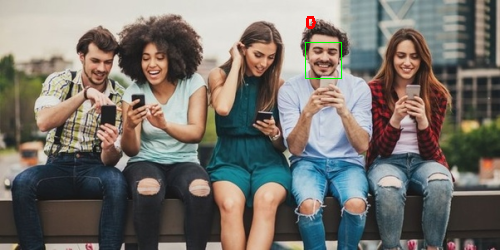

1 389 46 36 36


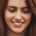

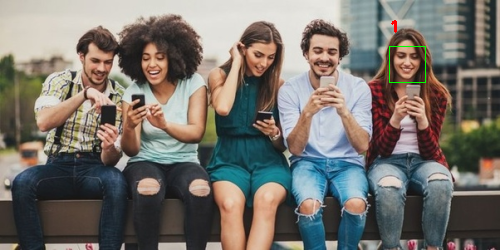

2 133 46 36 36


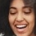

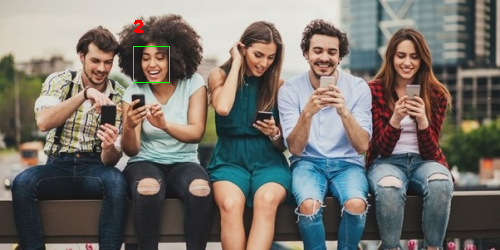

3 245 42 36 36


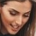

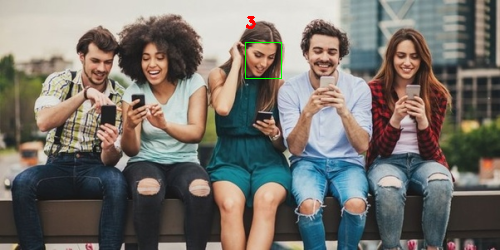

4 81 46 36 36


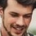

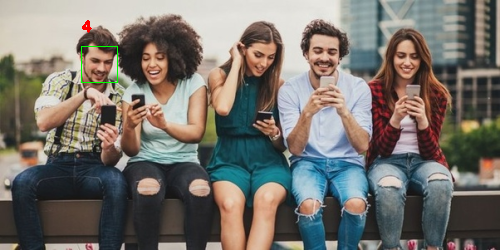

In [82]:
# USAGE
# python face_detection.py --image face1.jpg

# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
from google.colab.patches import cv2_imshow
# from matplotlib import pyplot as plt

def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)


# construct the argument parser and parse the arguments
path = '/content/peoplewithphone.jpeg'

# load the input image, resize it, and convert it to grayscale
image = cv2.imread(path)
image = imutils.resize(image, width=500)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()

# detect faces in the grayscale image
rects = detector(gray,1)
print(len(rects))

fname = path.split('/')[-1]
name, ext = fname.split('.')

# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    (x, y, w, h) = rect_to_bb(rect)
    print(i, x, y, w, h)

    fname = '{}_{}.{}'.format(name, i, ext)
    # clone the original image so we can draw on it, then
    # display the name of the face part on the image
    clone = image.copy()
    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 1)
    startX = x
    startY = y - 15 if y - 15 > 15 else y + 15
    cv2.putText(clone, str(i), (startX, startY),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    roi = image[y:y + h, x:x + w]
    cv2_imshow( roi)
    cv2.imwrite(fname, roi)
    cv2_imshow( clone)
    cv2.waitKey(0)

In [83]:
# USAGE
# python face_detection.py --image face1.jpg

# import the necessary packages
# from imutils import face_utils
# import numpy as np
import argparse
import imutils
import dlib
import cv2
from google.colab.patches import cv2_imshow

# from matplotlib import pyplot as plt

def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)


# construct the argument parser and parse the arguments
path = '/content/peoplewithphone.jpeg'


# load the input image, resize it, and convert it to grayscale
image = cv2.imread(path)
image = imutils.resize(image, width=100)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()

# detect faces in the grayscale image
rects = detector(gray, 1)
print(len(rects))

fname = path.split('/')[-1]
name, ext = fname.split('.')

# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    (x, y, w, h) = rect_to_bb(rect)
    print(i, x, y, w, h)

    fname = '{}_{}.{}'.format(name, i, ext)
    # clone the original image so we can draw on it, then
    # display the name of the face part on the image
    clone = image.copy()
    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 1)
    startX = x
    startY = y - 15 if y - 15 > 15 else y + 15
    cv2.putText(clone, str(i), (startX, startY),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    roi = image[y:y + h, x:x + w]
    cv2_imshow("ROI", roi)
    cv2.imwrite(fname, roi)
    cv2_imshow("Image", clone)
    cv2.waitKey(0)

0


5
0 305 42 36 36


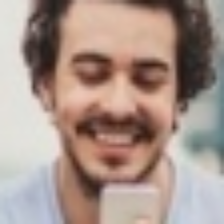

1 389 46 36 36


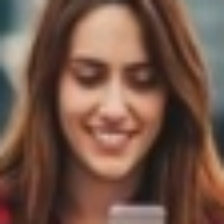

2 133 46 36 36


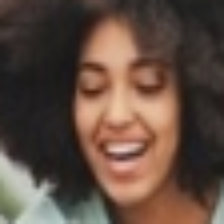

3 245 42 36 36


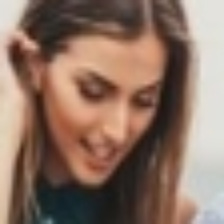

4 81 46 36 36


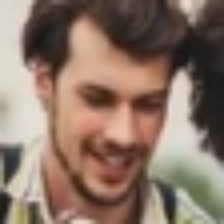

In [84]:
# USAGE
# python face_detection.py --image face1.jpg

# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
from google.colab.patches import cv2_imshow
# from matplotlib import pyplot as plt

def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)


# construct the argument parser and parse the arguments
path = '/content/peoplewithphone.jpeg'

# load the input image, resize it, and convert it to grayscale
image = cv2.imread(path)
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()

# detect faces in the grayscale image
rects = detector(gray, 1)
print(len(rects))

fname = path.split('/')[-1]
name, ext = fname.split('.')



for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    (x, y, w, h) = rect_to_bb(rect)
    print(i, x, y, w, h)
    x_inc = int(w *.3) - int(w * .001)
    y_inc = int(h *.3) - int(h *.1)
    

    sub_face = image[y-y_inc:y+h+y_inc, x-x_inc:x+w+x_inc]

    #sub_face = image[y-y_inc:y+h+y_inc, x-x_inc:x+w+x_inc]

    newimg = cv2.resize(sub_face,(int(224),int(224))) 
    cv2_imshow(newimg)
    


peoplewithphone_4.jpeg


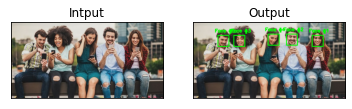

In [85]:
# Face landmarks Detection
# usage:
# python facelandmarkdetect.py --shape-predictor shape_predictor_68_face_landmarks.dat --image images/face1.jpg

# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import os
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
from random import random

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor()

# load the input image, resize it, and convert it to grayscale
image = plt.imread(imagePath)
orig = image
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)

	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# show the output image with the face detections + facial landmarks
plt.subplot(121)
plt.imshow(orig)
plt.xticks([])
plt.yticks([])
plt.title("Intput")

plt.subplot(122)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.title("Output")

fname = imagePath.split('/')[-1]
name, ext = fname.split('.')
fname = '{}_{}.{}'.format(name, i, ext)
print(fname)
plt.savefig(fname)
plt.show()